# 前処理を行う際のパラメータ選択

GridSearchCVを用いてSVCのより良いパラメータを求めることを考える。

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mglearn
import matplotlib.pyplot as plt

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)

In [4]:
X_train_scaled = scaler.transform(X_train)

svm = SVC()
svm.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.95


In [5]:
from sklearn.model_selection import GridSearchCV
# こんなふうに書いたらダメ。
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test_scaled, y_test)))

Best cross-validation accuracy: 0.98
Best parameters:  {'gamma': 1, 'C': 1}
Test set accuracy: 0.97


データをスケール変換する際に、学習データの全てのデータを使っている<b>問題</b>がある。そのスケール変換された学習データを用いて交差検証を用いてグリッドサーチしている。（上の図でtrainingとvalidationにスケール変換を入れてるのは問題。）

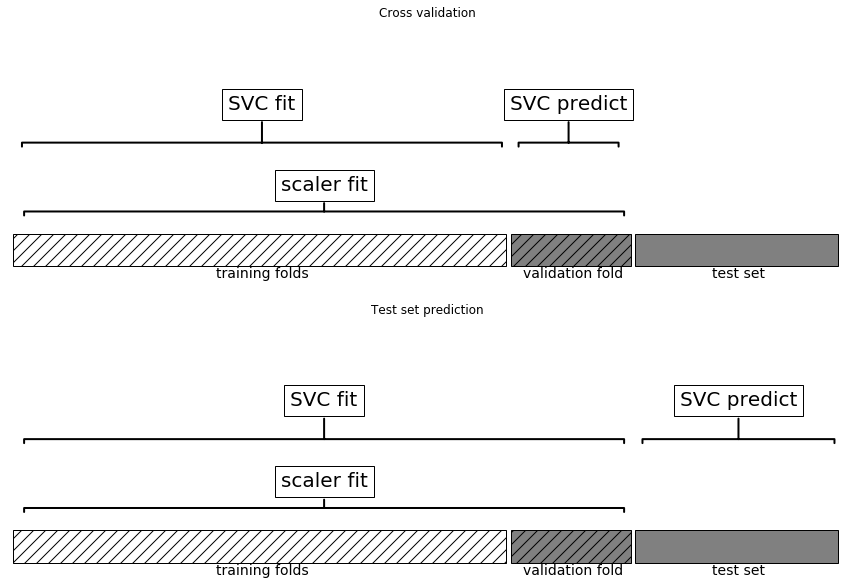

In [17]:
mglearn.plots.plot_improper_processing()
plt.show()



モデルの構築過程においてテストデータは完全に新しいデータである必要があるが，スケール変換の際に訓練データセット全体の情報を使っているため情報のリークが起きている．

この問題を回避するために，交差検定の為のデータの分割を行う必要がある．

